In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pit
import seaborn as sns # 시각화 라이브러리
import warnings # 경고창 없애기
import matplotlib.pyplot as pit
import matplotlib.pyplot as pit
import seaborn as sns
warnings.filterwarnings('ignore')

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [54]:
train

,no,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
1,2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
2,3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
3,4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
4,5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29301,29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29302,29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0
29303,29304,33,Private,157446,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0


In [55]:
train.columns

Index(['no', 'age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [56]:
X_train = train.drop(["no",'fnlwgt'], axis = 1)
X_test = test.drop(["no",'fnlwgt'], axis = 1)

In [57]:
y_train = train[['income']]

In [58]:
X_train.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

# capital

In [59]:
X_train['capital-gain'].describe()

count    29305.000000
mean      1084.531786
std       7495.715677
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [60]:
# bins : 구간
# 0초과 1이하, 1초과 4이하, 4초과 20이하
bins = [-1, 7494, 99999]
# labels 구간별 명칭
labels = ['A','B']
# cut 함수 : 카테고리(범주형) 데이터를 만듦 bins => 속성 값 / labels => 범주 이름
train_cut = pd.cut(train['capital-gain'], bins = bins, labels = labels)
X_train['gain_group'] = train_cut
test_cut = pd.cut(test['capital-gain'], bins = bins, labels = labels)
X_test['gain_group'] = test_cut

In [61]:
X_train['gain_group'].value_counts()

A    28311
B      994
Name: gain_group, dtype: int64

In [62]:
X_test['gain_group'].value_counts()

A    18863
B      674
Name: gain_group, dtype: int64

In [63]:
X_train['capital-loss'].describe()

count    29305.000000
mean        87.073571
std        401.225580
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

In [64]:
# bins : 구간
# 0초과 1이하, 1초과 4이하, 4초과 20이하
bins = [-1, 400, 4356]
# labels 구간별 명칭
labels = ['A','B']
# cut 함수 : 카테고리(범주형) 데이터를 만듦 bins => 속성 값 / labels => 범주 이름
train_cut = pd.cut(train['capital-loss'], bins = bins, labels = labels)
X_train['loss_group'] = train_cut
test_cut = pd.cut(test['capital-loss'], bins = bins, labels = labels)
X_test['loss_group'] = test_cut

In [65]:
X_train['loss_group'].value_counts()

A    27942
B     1363
Name: loss_group, dtype: int64

In [66]:
X_test['loss_group'].value_counts()

A    18629
B      908
Name: loss_group, dtype: int64

# fnlwgt

<AxesSubplot:xlabel='sex', ylabel='fnlwgt'>

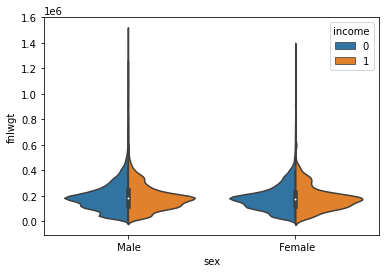

In [67]:
sns.violinplot(data = train, x = 'sex', y = 'fnlwgt', hue = 'income', split = True)

In [68]:
# bins : 구간
# 0초과 1이하, 1초과 4이하, 4초과 20이하
bins = [1.376900e+04, 1.176060e+05, 2.377130e+05,1.490400e+06]
# labels 구간별 명칭
labels = ['A','B', "C"]
# cut 함수 : 카테고리(범주형) 데이터를 만듦 bins => 속성 값 / labels => 범주 이름
train_cut = pd.cut(train['fnlwgt'], bins = bins, labels = labels)
X_train['fnl_group'] = train_cut
test_cut = pd.cut(test['fnlwgt'], bins = bins, labels = labels)
X_test['fnl_group'] = test_cut

In [69]:
X_train['fnl_group'].value_counts()

B    14650
A     7328
C     7326
Name: fnl_group, dtype: int64

In [70]:
X_test['fnl_group'].value_counts()

B    9754
A    4903
C    4876
Name: fnl_group, dtype: int64

# age -> age_group

In [71]:
X_train['age'].value_counts()

35    828
33    825
23    818
34    805
31    793
     ... 
88      4
85      2
89      1
86      1
87      1
Name: age, Length: 74, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='age'>

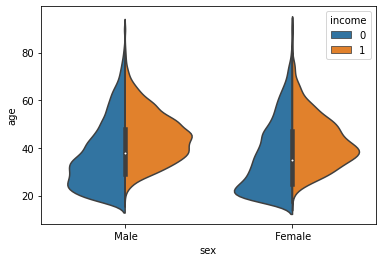

In [72]:
sns.violinplot(data = train, x = 'sex', y = 'age', hue = 'income', split = True)

In [73]:
X_train['age'].unique()

array([25, 39, 35, 64, 24, 66, 56, 70, 21, 33, 45, 54, 63, 58, 44, 31, 17,
       43, 18, 23, 50, 19, 38, 29, 30, 47, 28, 22, 59, 34, 49, 36, 32, 46,
       42, 61, 40, 26, 57, 27, 41, 37, 60, 48, 62, 53, 68, 75, 20, 51, 73,
       69, 72, 65, 76, 52, 55, 74, 90, 67, 78, 80, 77, 71, 81, 83, 82, 79,
       85, 87, 84, 88, 86, 89], dtype=int64)

In [74]:
X_train['age'].describe()

count    29305.000000
mean        38.659171
std         13.743827
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [75]:
# bins : 구간
# 0초과 1이하, 1초과 4이하, 4초과 20이하
bins = [13, 28, 48,90]
# labels 구간별 명칭
labels = ['A','B', "C"]
# cut 함수 : 카테고리(범주형) 데이터를 만듦 bins => 속성 값 / labels => 범주 이름
train_cut = pd.cut(train['age'], bins = bins, labels = labels)
X_train['age_group'] = train_cut
test_cut = pd.cut(test['age'], bins = bins, labels = labels)
X_test['age_group'] = test_cut

In [76]:
X_train['age_group'].value_counts()

B    14414
A     7948
C     6943
Name: age_group, dtype: int64

In [77]:
X_test['age_group'].value_counts()

B    9615
A    5344
C    4578
Name: age_group, dtype: int64

# education

<AxesSubplot:xlabel='sex', ylabel='education-num'>

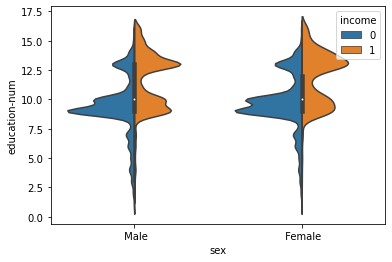

In [78]:
sns.violinplot(data = train, x = 'sex', y = 'education-num', hue = 'income', split = True)

In [79]:
X_train['education-num'].describe()

count    29305.000000
mean        10.083057
std          2.570371
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

In [80]:
# bins : 구간
# 0초과 1이하, 1초과 4이하, 4초과 20이하
bins = [1, 9 ,12,16]
# labels 구간별 명칭
labels = ['A','B',"C"]
# cut 함수 : 카테고리(범주형) 데이터를 만듦 bins => 속성 값 / labels => 범주 이름
train_cut = pd.cut(train['education-num'], bins = bins, labels = labels)
X_train['edu_group'] = train_cut
test_cut = pd.cut(test['education-num'], bins = bins, labels = labels)
X_test['edu_group'] = test_cut

In [81]:
X_train['edu_group'].value_counts()

A    13209
B     8768
C     7282
Name: edu_group, dtype: int64

In [82]:
X_test['edu_group'].value_counts()

A    8900
B    5772
C    4828
Name: edu_group, dtype: int64

# occupation

In [83]:
X_train["occupation"] = X_train["occupation"].str.replace('?', 'other')
X_test["occupation"] = X_test["occupation"].str.replace('?', 'other')
X_train["occupation"] = X_train["occupation"].str.replace('Armed-Forces', 'other')
X_test["occupation"] = X_test["occupation"].str.replace('Armed-Forces', 'other')
X_train["occupation"] = X_train["occupation"].str.replace('Priv-house-serv', 'other')
X_test["occupation"] = X_test["occupation"].str.replace('Priv-house-serv', 'other')
X_train["occupation"] = X_train["occupation"].str.replace('?', 'other')
X_test["occupation"] = X_test["occupation"].str.replace('?', 'other')

In [84]:
X_train['occupation'].value_counts()

 Prof-specialty       3724
 Craft-repair         3632
 Exec-managerial      3609
 Adm-clerical         3440
 Sales                3292
 Other-service        2975
 other                1824
 Machine-op-inspct    1811
 Transport-moving     1393
 Handlers-cleaners    1249
 Farming-fishing       888
 Tech-support          865
 Protective-serv       603
Name: occupation, dtype: int64

In [85]:
X_test['occupation'].value_counts()

 Craft-repair         2480
 Exec-managerial      2477
 Prof-specialty       2448
 Sales                2212
 Adm-clerical         2171
 Other-service        1948
 other                1242
 Machine-op-inspct    1211
 Transport-moving      962
 Handlers-cleaners     823
 Farming-fishing       602
 Tech-support          581
 Protective-serv       380
Name: occupation, dtype: int64

# marry

In [86]:
X_train['marital-status'].value_counts()

 Married-civ-spouse       13331
 Never-married             9673
 Divorced                  4030
 Widowed                    942
 Separated                  914
 Married-spouse-absent      394
 Married-AF-spouse           21
Name: marital-status, dtype: int64

In [87]:
X_train["marital-status"] = X_train["marital-status"].str.replace('Married-spouse-absent','Other')
X_test["marital-status"] = X_test["marital-status"].str.replace('Married-spouse-absent','Other')
X_train["marital-status"] = X_train["marital-status"].str.replace('Married-AF-spouse','Other')
X_test["marital-status"] = X_test["marital-status"].str.replace('Married-AF-spouse','Other')

In [88]:
X_train['marital-status'].value_counts()

 Married-civ-spouse    13331
 Never-married          9673
 Divorced               4030
 Widowed                 942
 Separated               914
 Other                   415
Name: marital-status, dtype: int64

In [89]:
X_test['marital-status'].value_counts()

 Married-civ-spouse    9048
 Never-married         6444
 Divorced              2603
 Separated              616
 Widowed                576
 Other                  250
Name: marital-status, dtype: int64

# work_hour

In [90]:
X_train['hours-per-week'].value_counts()

40    13652
50     2554
45     1647
60     1352
35     1154
      ...  
97        1
73        1
82        1
94        1
69        1
Name: hours-per-week, Length: 93, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='hours-per-week'>

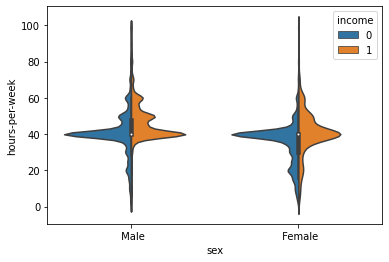

In [91]:
sns.violinplot(data = train, x = 'sex', y = 'hours-per-week', hue = 'income', split = True)

In [92]:
X_train['hours-per-week'].describe()

count    29305.000000
mean        40.440096
std         12.332840
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [93]:
# bins : 구간
# 0초과 1이하, 1초과 4이하, 4초과 20이하
bins = [1, 40,45, 90]
# labels 구간별 명칭
labels = ['A','B',"C"]
# cut 함수 : 카테고리(범주형) 데이터를 만듦 bins => 속성 값 / labels => 범주 이름
train_cut = pd.cut(train['hours-per-week'], bins = bins, labels = labels)
X_train['work_hour'] = train_cut
X_train['work_hour']
X_test['work_hour'] = test_cut
X_test['work_hour'] = test_cut

In [94]:
X_train['work_hour'].value_counts()

A    20639
C     6386
B     2186
Name: work_hour, dtype: int64

In [95]:
X_test['work_hour'].value_counts()

A    8900
B    5772
C    4828
Name: work_hour, dtype: int64

# country

In [96]:
X_train['native-country'] = X_train['native-country'].str.replace('?', 'Other')
X_test['native-country'] = X_test['native-country'].str.replace('?', 'Other')
X_train['native-country'] = X_train['native-country'].str.replace('Holand-Netherlands', 'Other')
X_test['native-country'] = X_test['native-country'].str.replace('Holand-Netherlands', 'Other')
X_train['native-country'] = X_train['native-country'].str.replace('Scotland', 'Other')
X_test['native-country'] = X_test['native-country'].str.replace('Scotland', 'Other')
X_train['native-country'] = X_train['native-country'].str.replace('Honduras', 'Other')
X_test['native-country'] = X_test['native-country'].str.replace('Honduras', 'Other')
X_train['native-country'] = X_train['native-country'].str.replace('Hungary', 'Other')
X_test['native-country'] = X_test['native-country'].str.replace('Hungary', 'Other')
X_train['native-country'] = X_train['native-country'].str.replace('Yugoslavia', 'Other')
X_test['native-country'] = X_test['native-country'].str.replace('Yugoslavia', 'Other')
X_train['native-country'] = X_train['native-country'].str.replace('Laos', 'Other')
X_test['native-country'] = X_test['native-country'].str.replace('Laos', 'Other')
X_train['native-country'] = X_train['native-country'].str.replace('Trinadad&Tobago', 'Other')
X_test['native-country'] = X_test['native-country'].str.replace('Trinadad&Tobago', 'Other')

In [97]:
X_train['native-country'].value_counts()

 United-States                 26301
 Mexico                          579
 Other                           567
 Philippines                     178
 Germany                         124
 Puerto-Rico                     117
 Canada                          111
 El-Salvador                      96
 Cuba                             94
 India                            90
 England                          75
 South                            74
 Jamaica                          68
 China                            68
 Dominican-Republic               61
 Italy                            60
 Japan                            54
 Poland                           53
 Columbia                         53
 Guatemala                        51
 Haiti                            51
 Vietnam                          50
 Portugal                         43
 Taiwan                           39
 Iran                             38
 Nicaragua                        28
 Greece                           25
 

# workclass

In [98]:
X_train["workclass"] = X_train["workclass"].str.replace('?', 'Other')
X_test["workclass"] = X_test["workclass"].str.replace('?', 'Other')
X_train["workclass"] = X_train["workclass"].str.replace('Without-pay', 'Other')
X_test["workclass"] = X_test["workclass"].str.replace('Without-pay', 'Other')
X_train["workclass"] = X_train["workclass"].str.replace('Never-worked', 'Other')
X_test["workclass"] = X_test["workclass"].str.replace('Never-worked', 'Other')

In [99]:
X_train['workclass'].value_counts()

 Private             20410
 Self-emp-not-inc     2305
 Local-gov            1868
 Other                1680
 State-gov            1201
 Self-emp-inc          987
 Federal-gov           854
Name: workclass, dtype: int64

In [100]:
X_test['workclass'].value_counts()

 Private             13496
 Self-emp-not-inc     1557
 Local-gov            1268
 Other                1150
 State-gov             780
 Self-emp-inc          708
 Federal-gov           578
Name: workclass, dtype: int64

# relationship

In [101]:
X_train['relationship'].value_counts()

 Husband           11769
 Not-in-family      7637
 Own-child          4554
 Unmarried          3071
 Wife               1370
 Other-relative      904
Name: relationship, dtype: int64

In [102]:
X_test['relationship'].value_counts()

 Husband           7947
 Not-in-family     4946
 Own-child         3027
 Unmarried         2054
 Wife               961
 Other-relative     602
Name: relationship, dtype: int64

# race

In [103]:
X_train['race'].value_counts()

 White                 25081
 Black                  2776
 Asian-Pac-Islander      919
 Amer-Indian-Eskimo      290
 Other                   239
Name: race, dtype: int64

In [104]:
X_test['race'].value_counts()

 White                 16681
 Black                  1909
 Asian-Pac-Islander      600
 Amer-Indian-Eskimo      180
 Other                   167
Name: race, dtype: int64

# 컬럼정리

In [105]:
X_train.shape, y_train.shape, X_test.shape

((29305, 20), (29305, 1), (19537, 19))

In [106]:
X_train.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income',
       'gain_group', 'loss_group', 'fnl_group', 'age_group', 'edu_group',
       'work_hour'],
      dtype='object')

In [107]:
#X_train.drop(["age","hours-per-week", 'education-num',"fnlwgt", "capital-gain", "capital-loss"], axis = 1, inplace = True)
#X_test.drop(["age","hours-per-week", 'education-num',"fnlwgt","capital-gain", "capital-loss"], axis = 1, inplace = True)

In [108]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [109]:
X_train.shape, y_train.shape, X_test.shape

((29305, 20), (29305, 1), (19537, 19))

In [110]:
X_train

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,gain_group,loss_group,fnl_group,age_group,edu_group,work_hour
0,25,Private,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0,A,A,B,A,A,A
1,39,Private,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0,A,B,A,B,B,C
2,35,Private,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0,A,A,B,B,C,C
3,64,Private,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0,A,A,B,C,B,A
4,24,Private,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1,A,A,A,A,B,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29300,20,Private,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0,A,A,A,A,A,A
29301,21,Private,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0,A,A,C,A,A,A
29302,18,Self-emp-not-inc,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0,A,A,C,A,A,A
29303,33,Private,11th,7,Never-married,Craft-repair,Not-in-family,White,Male,0,0,65,United-States,0,A,A,B,B,A,C


In [111]:
categorical_feature = ['sex', 'workclass',"education",'marital-status', 'occupation', 'relationship', 'race', 'native-country', "age_group", "edu_group","work_hour",'fnl_group',"gain_group","loss_group"]

In [112]:
y_train = train['income']
X_train.drop('income', axis =1, inplace = True)

In [113]:
X_train.shape, X_test.shape

((29305, 19), (19537, 19))

In [114]:
combine = pd.concat([X_train,X_test], ignore_index =True)

In [115]:
# 원핫 인코딩
# get_dummies
one_hot = pd.get_dummies(combine[categorical_feature])

In [116]:
one_hot

,sex_ Female,sex_ Male,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Other,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,education_ 10th,...,work_hour_A,work_hour_B,work_hour_C,fnl_group_A,fnl_group_B,fnl_group_C,gain_group_A,gain_group_B,loss_group_A,loss_group_B
0,0,1,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
4,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0
48838,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
48839,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
48840,1,0,0,0,0,1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0


In [117]:
# 기존 글자데이터 지우기
combine.drop(categorical_feature, axis = 1, inplace = True)

In [118]:
# 원핫 인코딩 데이터 합치기
total_combine = pd.concat([combine, one_hot], axis = 1)

In [119]:
total_combine

,age,education-num,capital-gain,capital-loss,hours-per-week,sex_ Female,sex_ Male,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Other,...,work_hour_A,work_hour_B,work_hour_C,fnl_group_A,fnl_group_B,fnl_group_C,gain_group_A,gain_group_B,loss_group_A,loss_group_B
0,25,7,0,0,40,0,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0
1,39,10,0,1721,55,1,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
2,35,13,0,0,50,1,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
3,64,11,0,0,40,1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
4,24,10,0,0,70,0,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,45,9,0,0,60,0,1,0,0,0,...,1,0,0,1,0,0,1,0,1,0
48838,48,9,0,0,50,1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
48839,63,10,4386,0,40,0,1,0,0,0,...,0,1,0,1,0,0,1,0,1,0
48840,18,7,0,0,20,1,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0


In [120]:
total_combine.shape

(48842, 111)

In [121]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(max_depth = 6)

In [122]:
X_train = total_combine.iloc[:29305]
X_test = total_combine.iloc[29305:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(29305, 111)
(19537, 111)
(29305,)


In [123]:
tree_model = DecisionTreeClassifier(max_depth = 4)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [124]:
tree_model.score(X_train, y_train)

0.8411192629244156

In [125]:
pre = tree_model.predict(X_test)

In [126]:
no = pd.read_csv('./sample_submission.csv')
no['income'] = pre
no.to_csv('mySubmission00.csv', index = False)

In [127]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [128]:
# 검증 데이터 만들기(validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 4)

In [129]:
train_score_list = []
val_score_list = []

for md in range(1,25) : # 트리 모델이 단순 -> 복잡
    t_model = DecisionTreeClassifier(max_depth=md)
    t_model.fit(X_train,y_train)
    
    train_score = t_model.score(X_train,y_train)
    val_score = t_model.score(X_val,y_val)
    
    train_score_list.append(train_score)
    val_score_list.append(val_score)

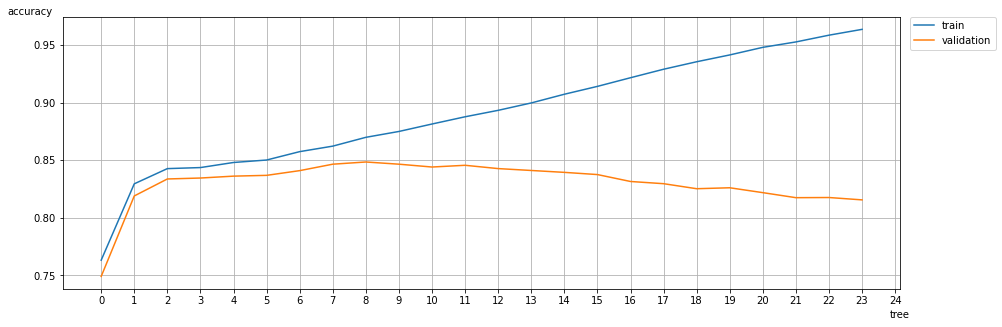

In [130]:
plt.figure(figsize=(15,5)) # 가로,세로
plt.plot(train_score_list,label='train')
plt.plot(val_score_list,label='validation')
plt.xticks(range(0,25))
plt.legend(loc = "upper right", bbox_to_anchor = (1.12,1.02)) # 범례
plt.xlabel('tree', position =(1,0))
plt.ylabel('accuracy', rotation = 0, position = (1,1))
plt.grid()
plt.show()

In [131]:
X_train = pd.concat([X_train, X_val])
y_train = pd.concat([y_train, y_val])

In [132]:
final_tree = DecisionTreeClassifier(max_depth = 8)
final_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [133]:
final_pre = final_tree.predict(X_test)

In [134]:
final_tree.score(X_train, y_train)

0.8580788261388842

In [135]:
pre = final_tree.predict(X_test)
no = pd.read_csv('./sample_submission.csv')
no['income'] = pre
no.to_csv('mySubmission00.csv', index = False)

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier

In [141]:
gb = GradientBoostingClassifier(random_state=3,learning_rate=0.19,max_depth=6)
gb.fit(X_train,y_train)
print("훈련 세트 정확도 : {:.3f}".format(gb.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(gb.score(X_val,y_val)))

훈련 세트 정확도 : 0.899
테스트 세트 정확도 : 0.894


In [142]:
pre = gb.predict(X_test)
no = pd.read_csv('./sample_submission.csv')
no['income'] = pre
no.to_csv('mySubmission0.csv', index = False)

In [87]:
# bagging = BaggingClassifier(LogisticRegression(),
#                             n_estimators=200,oob_score = True, 
#                             random_state =2, max_depth=5)
# bagging.fit(X_train,y_train)
# print("훈련 세트 정확도 : {:.3f}".format(bagging.score(X_train,y_train)))
# print("테스트 세트 정확도 : {:.3f}".format(bagging.score(X_val,y_val)))
# print("샘플 정확도 : {:.3f}".format(bagging.oob_score_))

In [88]:
# pre = bagging.predict(X_test)
# no = pd.read_csv('./sample_submission.csv')
# no['income'] = pre
# no.to_csv('mySubmission2.csv', index = False)

In [ ]:
ada = AdaBoostClassifier(n_estimators =500, 
                         random_state = 42)
ada.fit(X_train, y_train)
print("훈련 세트 정확도 : {:.3f}".format(ada.score(X_train,y_train)))
print("테스트 세트 정확도 : {:.3f}".format(ada.score(X_val,y_val)))

In [ ]:
pre = ada.predict(X_test)
no = pd.read_csv('./sample_submission.csv')
no['income'] = pre
no.to_csv('mySubmission3.csv', index = False)